# StructBERT: Incorporating Language Structures into Pre-training for Deep Language Understanding

* [Paper](https://arxiv.org/abs/1908.04577)
* [Official github repo](https://github.com/alibaba/AliceMind/tree/main/StructBERT)
* [Forked repo for this CommonLit Readability Prize Competition](https://github.com/bayartsogt-ya/AliceMind/tree/main/StructBERT)

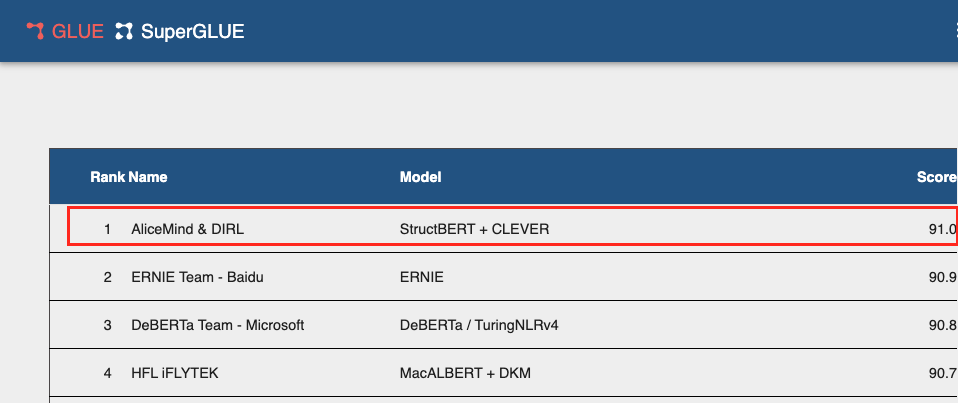

## Introduction
We extend BERT to a new model, StructBERT, by incorporating language structures into pre-training. 
Specifically, we pre-train StructBERT with two auxiliary tasks to make the most of the sequential 
order of words and sentences, which leverage language structures at the word and sentence levels, 
respectively.

## Results
The results of GLUE & CLUE tasks can be reproduced using the hyperparameters listed in the following "Example usage" section.
#### structbert.en.large
[GLUE benchmark](https://gluebenchmark.com/leaderboard)

|Model| MNLI | QNLIv2 | QQP | SST-2 | MRPC | 
|--------------------|-------|-------|-------|-------|-------|
|structbert.en.large |86.86% |93.04% |91.67% |93.23% |86.51% |

#### structbert.ch.large
[CLUE benchmark](https://www.cluebenchmarks.com/)

|Model | CMNLI | OCNLI | TNEWS | AFQMC |
|--------------------|-------|-------|-------|-------|
|structbert.ch.large |84.47% |81.28% |68.67% |76.11% | 


In [ ]:
!git clone https://github.com/bayartsogt-ya/AliceMind.git

In [ ]:
%cd AliceMind/StructBERT

In [ ]:
ls

In [ ]:
%%time
!source download_checkpoint.sh

In [ ]:
# !mkdir output
!ls data/commonlit/fold_0
!ls config/large_bert_config.json
!ls config/vocab.txt
!ls models/en_model

In [ ]:
!python run_classifier_multi_task.py \
    --data_dir data/commonlit/fold_0 \
    --bert_config_file config/large_bert_config.json \
    --task_name commonlit \
    --vocab_file config/vocab.txt \
    --output_dir output \
    --init_checkpoint models/en_model \
    --max_seq_length 256 \
    --do_train \
    --do_eval \
    --lr_decay_factor 0.1 \
    --dropout 0.1 \
    --train_batch_size 8 \
    --eval_batch_size 8 \
    --learning_rate 2e-5 \
    --num_train_epochs 10 \
    --warmup_proportion 0.1 \
    --save_model  \
    --seed 1000 \
    --num_workers 2
# \
#     --debug

In [ ]:
"""
ground_truth | prediction
------------ | ----------
0.19968727231025696	-0.264123797416687
0.08814816176891327	-0.5634984374046326
-1.1981923580169678	-1.7749090194702148
-1.1999571323394775	-0.5880406498908997
"""
!head output/commonlit.eval_logits_EP7